### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load Dataset

In [2]:
#load the dataset

In [7]:
load=pd.read_csv("googl_daily_prices.csv")
load

,date,1. open,2. high,3. low,4. close,5. volume
0,2025-05-22,171.850,176.77,170.71,170.870,74530386.0
1,2025-05-21,163.690,173.14,163.56,168.560,73415956.0
2,2025-05-20,166.430,168.50,162.90,163.980,46607656.0
3,2025-05-19,164.510,166.64,164.22,166.540,30426097.0
4,2025-05-16,167.725,169.35,165.62,166.190,42846925.0
...,...,...,...,...,...,...
5219,2004-08-25,104.760,108.00,103.88,106.000,9188600.0
5220,2004-08-24,111.240,111.60,103.57,104.870,15247300.0
5221,2004-08-23,110.760,113.48,109.05,109.400,18256100.0
5222,2004-08-20,101.010,109.08,100.50,108.310,22834300.0


### Data Analysis

In [3]:
#Renaming the column name for better understanding
load=load.rename(columns={'date':'Trading Date','1. open':'Opening Price','2. high':'Highest Price','3. low':'Lowest Price','4. close':'Closing Price','5. volume':'Shares Traded'	})
load

,Trading Date,Opening Price,Highest Price,Lowest Price,Closing Price,Shares Traded
0,2025-05-22,171.850,176.77,170.71,170.870,74530386.0
1,2025-05-21,163.690,173.14,163.56,168.560,73415956.0
2,2025-05-20,166.430,168.50,162.90,163.980,46607656.0
3,2025-05-19,164.510,166.64,164.22,166.540,30426097.0
4,2025-05-16,167.725,169.35,165.62,166.190,42846925.0
...,...,...,...,...,...,...
5219,2004-08-25,104.760,108.00,103.88,106.000,9188600.0
5220,2004-08-24,111.240,111.60,103.57,104.870,15247300.0
5221,2004-08-23,110.760,113.48,109.05,109.400,18256100.0
5222,2004-08-20,101.010,109.08,100.50,108.310,22834300.0


In [5]:
#check if the dataset has null values

In [4]:
load.isnull().sum()


Trading Date     0
Opening Price    0
Highest Price    0
Lowest Price     0
Closing Price    0
Shares Traded    0
dtype: int64

In [5]:
load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5224 entries, 0 to 5223
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Trading Date   5224 non-null   object 
 1   Opening Price  5224 non-null   float64
 2   Highest Price  5224 non-null   float64
 3   Lowest Price   5224 non-null   float64
 4   Closing Price  5224 non-null   float64
 5   Shares Traded  5224 non-null   float64
dtypes: float64(5), object(1)
memory usage: 245.0+ KB


In [6]:
load.describe()

,Opening Price,Highest Price,Lowest Price,Closing Price,Shares Traded
count,5224.00000,5224.000000,5224.000000,5224.000000,5.224000e+03
mean,765.04442,772.674837,757.026645,764.986240,9.720226e+06
std,612.98739,619.106544,606.453529,612.911883,1.203831e+07
min,85.40000,86.520000,83.340000,83.430000,4.656380e+05
25%,400.82500,405.657500,394.041750,399.347575,1.813287e+06
50%,585.99000,589.305000,579.230000,584.370000,4.563600e+06
75%,1001.22750,1008.620000,993.050000,1003.445000,1.309645e+07
max,3025.00000,3030.931500,2977.980000,2996.770000,1.277476e+08


In [7]:
#Value counts for categorical columns (e.g., open, close, high, low)

In [8]:
for col in load.select_dtypes(include=['object','float']).columns:
    print(f"\n{col}:")
    print(load[col].value_counts())


Trading Date:
Trading Date
2025-05-22    1
2011-08-05    1
2011-07-12    1
2011-07-13    1
2011-07-14    1
             ..
2018-06-20    1
2018-06-21    1
2018-06-22    1
2018-06-25    1
2004-08-19    1
Name: count, Length: 5224, dtype: int64

Opening Price:
Opening Price
1160.00    3
575.00     3
568.00     3
547.00     3
567.00     3
          ..
1182.74    1
1208.53    1
1206.65    1
1199.24    1
110.76     1
Name: count, Length: 5013, dtype: int64

Highest Price:
Highest Price
507.00     3
508.60     3
553.00     3
520.00     3
950.00     3
          ..
1275.00    1
1278.24    1
1287.40    1
1291.44    1
104.06     1
Name: count, Length: 5010, dtype: int64

Lowest Price:
Lowest Price
478.50     3
510.00     3
519.00     3
536.00     3
578.00     3
          ..
1157.23    1
1162.56    1
1155.37    1
1173.10    1
109.05     1
Name: count, Length: 5065, dtype: int64

Closing Price:
Closing Price
583.000     4
580.000     3
616.500     3
162.780     2
100.990     2
           ..
1184.

In [9]:
#We have to create a new column for prediocted analysis and the last row will now have a NaN because there's no “next day” after the last date.so we have to Drop the last row with NaN in target

In [10]:
load['Next Day Closing Price'] = load['Closing Price'].shift(-1)
# Drop the last row with NaN in target
load.dropna(subset=['Next Day Closing Price'], inplace=True)


In [11]:
# Compute correlation matrix
corr_matrix = load.corr(numeric_only=True)

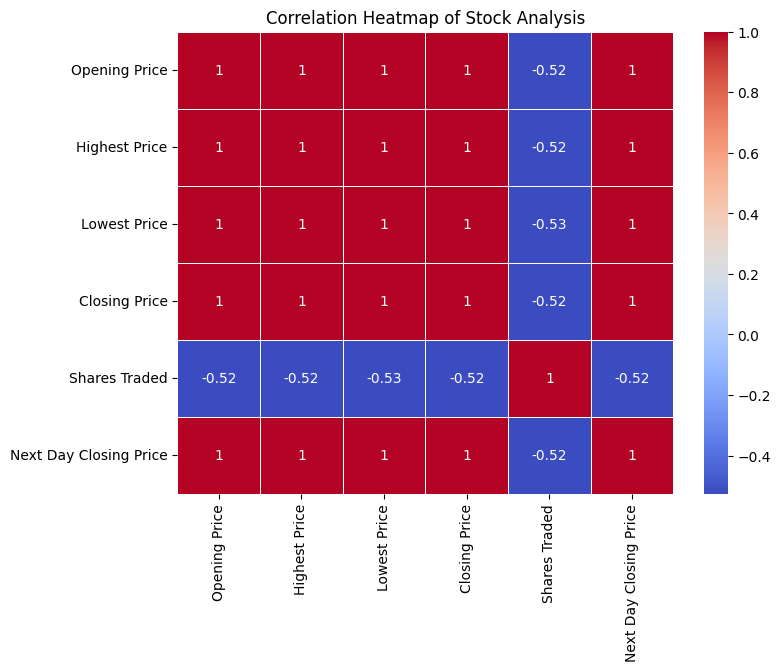

In [12]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Analysis")
plt.savefig('heatmap.png')
plt.show()

### DATA VISUALIZATION

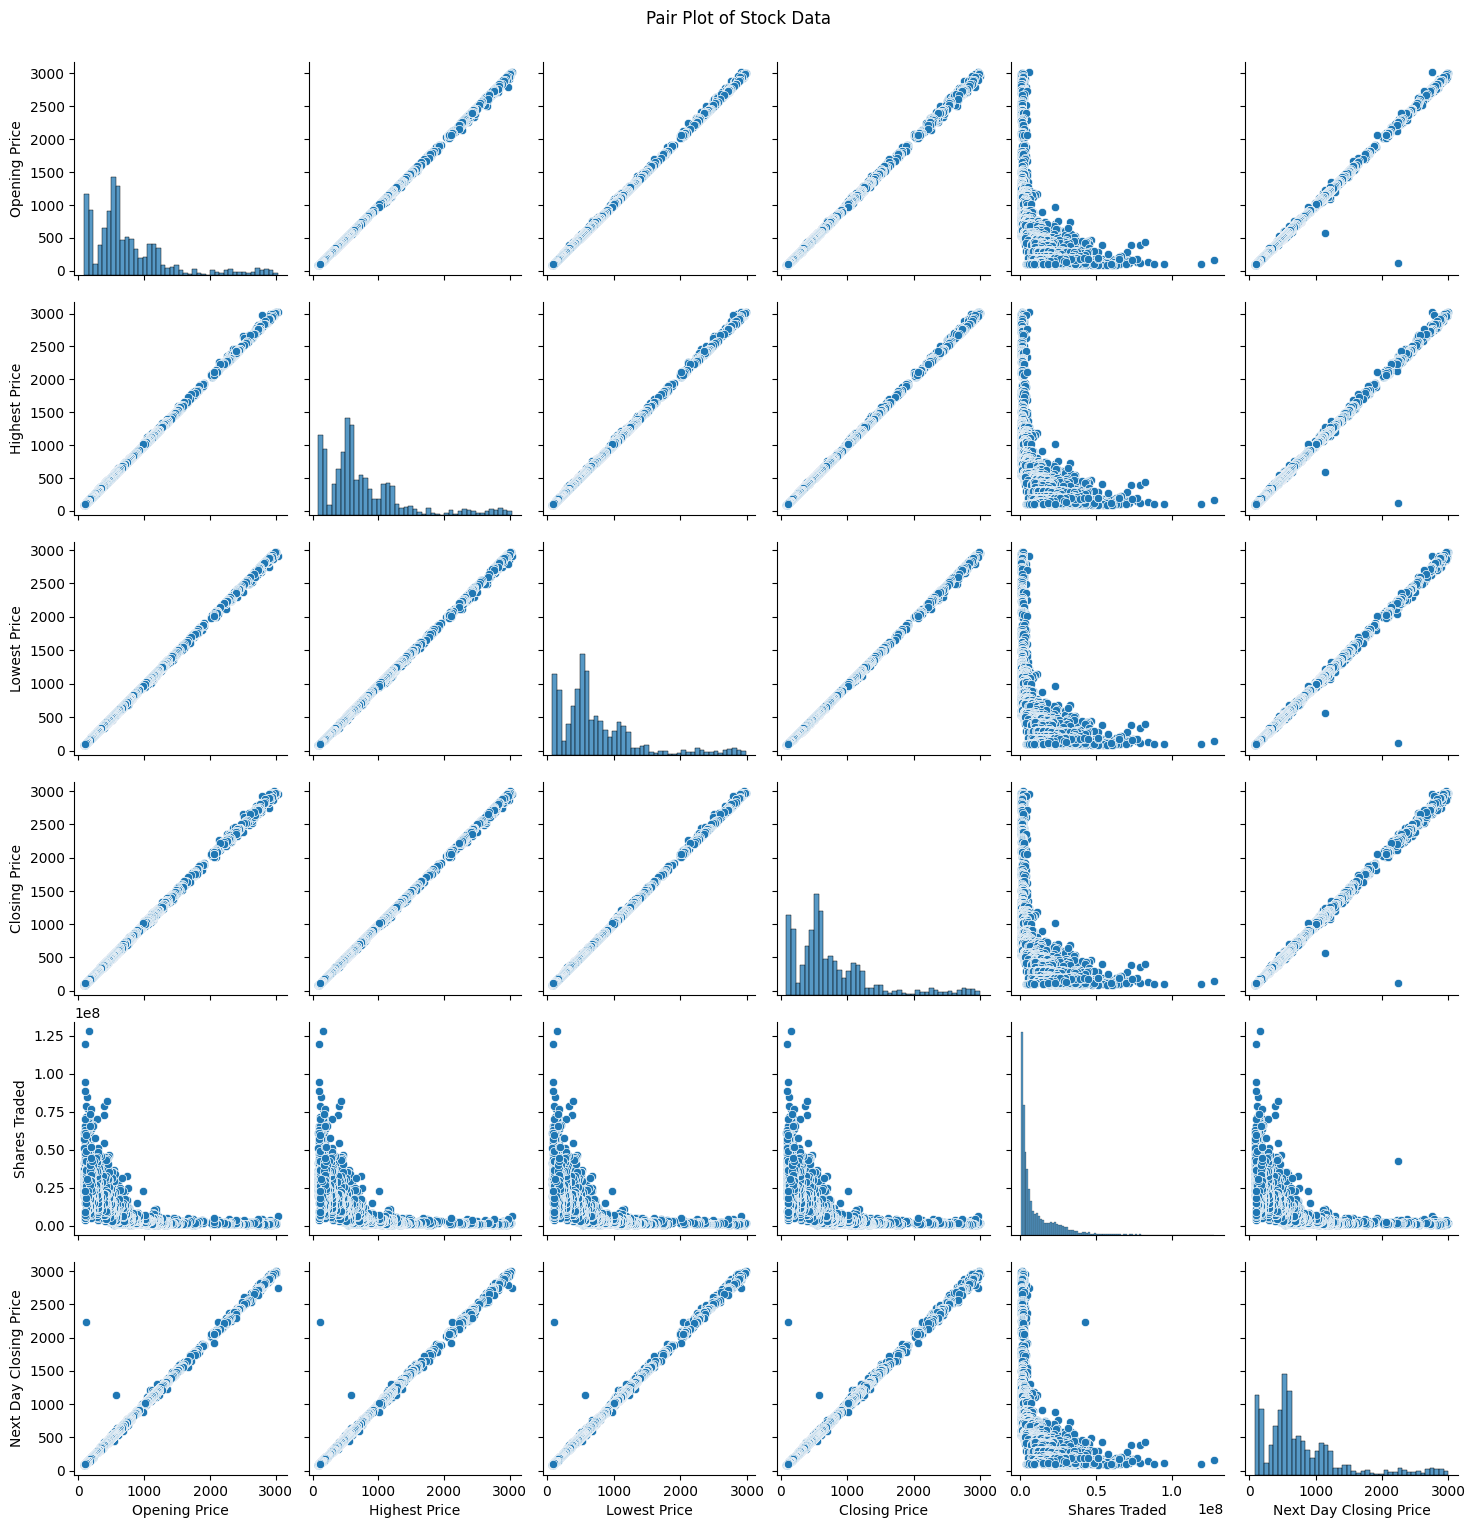

In [13]:
# Pair plot 
sns.pairplot(load, diag_kind='hist')
plt.suptitle('Pair Plot of Stock Data', y=1.02)
plt.savefig('pairplot.png')
plt.show()

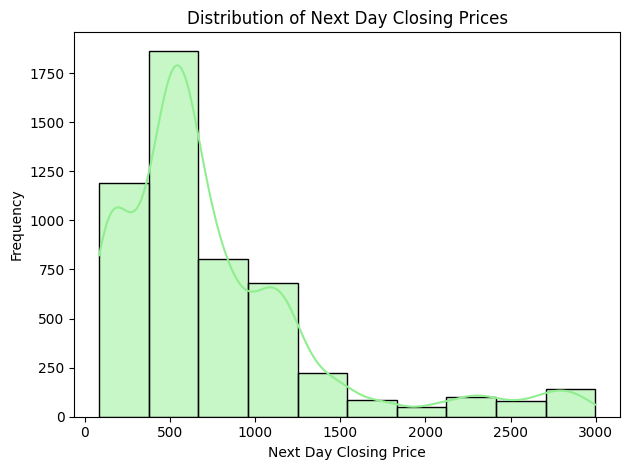

In [14]:
# Histogram of the 'Next Day Closing Price'
sns.histplot(load['Next Day Closing Price'], bins=10, kde=True, color='lightgreen')
plt.title('Distribution of Next Day Closing Prices')
plt.xlabel('Next Day Closing Price')
plt.ylabel('Frequency')
plt.savefig('distribution.png')
plt.tight_layout()
plt.show()


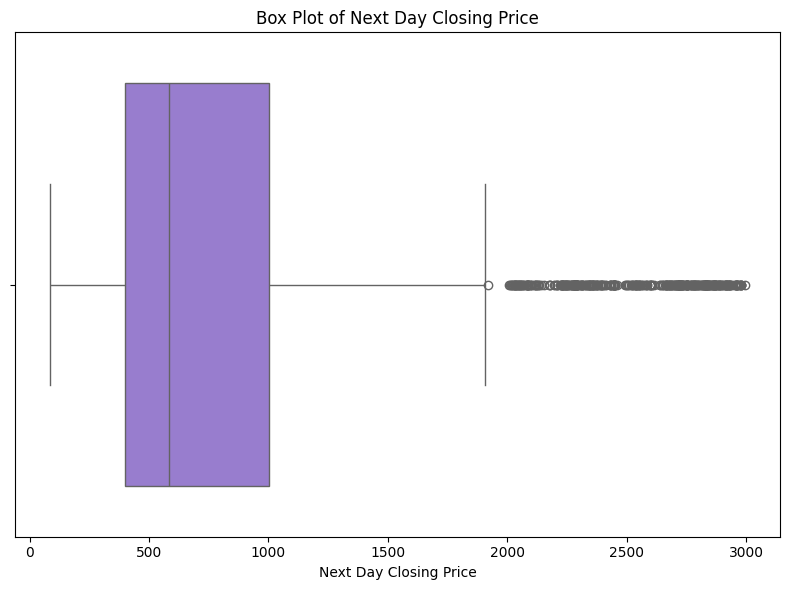

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=load['Next Day Closing Price'], color='mediumpurple')
plt.title('Box Plot of Next Day Closing Price')
plt.xlabel('Next Day Closing Price')
plt.tight_layout()
plt.savefig('next_day_price_boxplot.png')
plt.show()


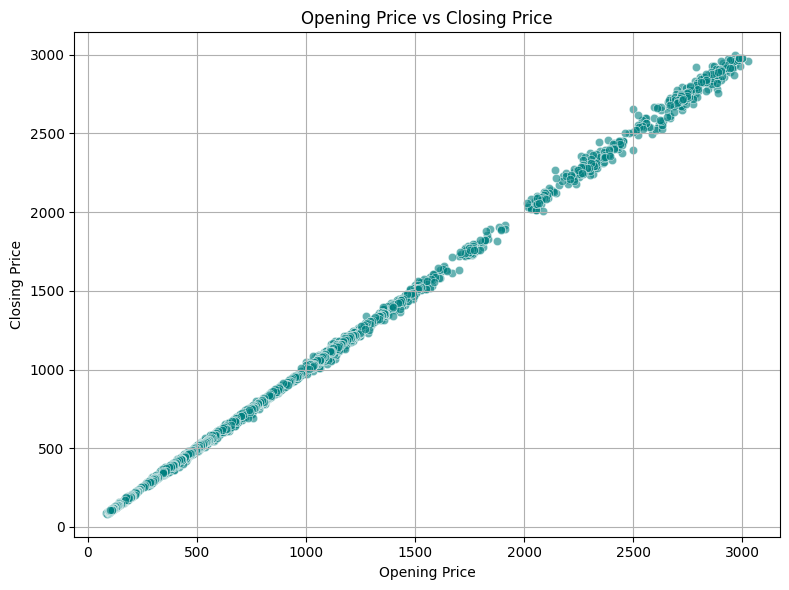

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=load['Opening Price'], y=load['Closing Price'], color='teal',alpha=0.6)
plt.title('Opening Price vs Closing Price')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.grid(True)
plt.savefig('scatter.png')
plt.tight_layout()
plt.show()


C:\Users\munir\AppData\Local\Temp\ipykernel_17300\622589457.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Closing Price', data=annual_avg, palette='viridis')


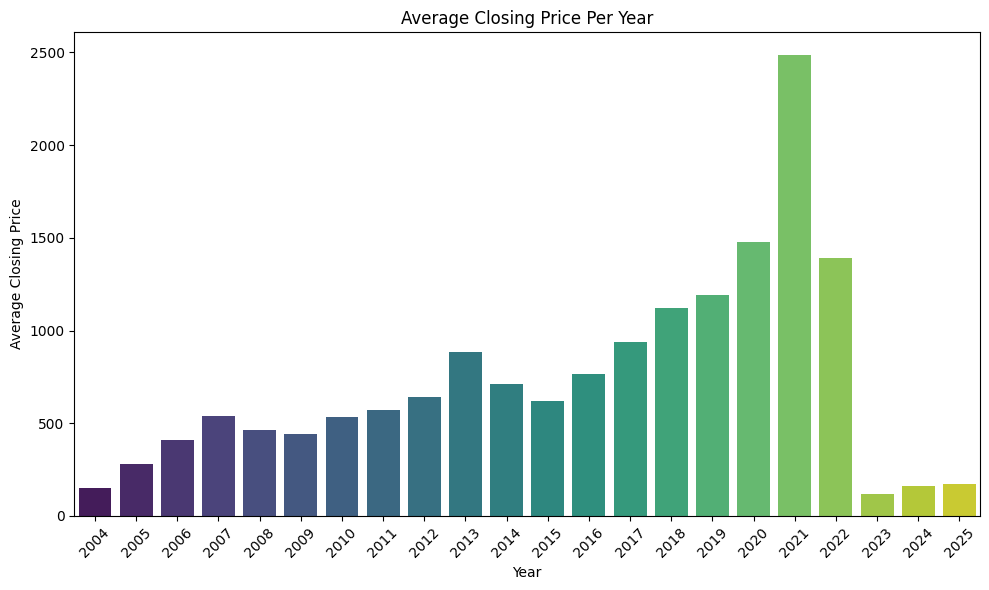

In [17]:
#A grouped bar plot to see average closing price per year 
load['Trading Date'] = pd.to_datetime(load['Trading Date'], errors='coerce')
# Extract year from 'date'
load['Year'] = load['Trading Date'].dt.year
# Group by year and calculate average of 'Closing Price'
annual_avg = load.groupby('Year')['Closing Price'].mean().reset_index()
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Closing Price', data=annual_avg, palette='viridis')
plt.title('Average Closing Price Per Year')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('annual_avg_close_barplot.png')
plt.show()



### Prediction Modeling

## Random Forest

In [18]:
X = load[['Opening Price', 'Closing Price', 'Highest Price', 'Lowest Price']]  
y=load['Next Day Closing Price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [20]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [21]:
y_pred = rf_model.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


MAE: 6.61
RMSE: 16.05
R² Score: 0.9993


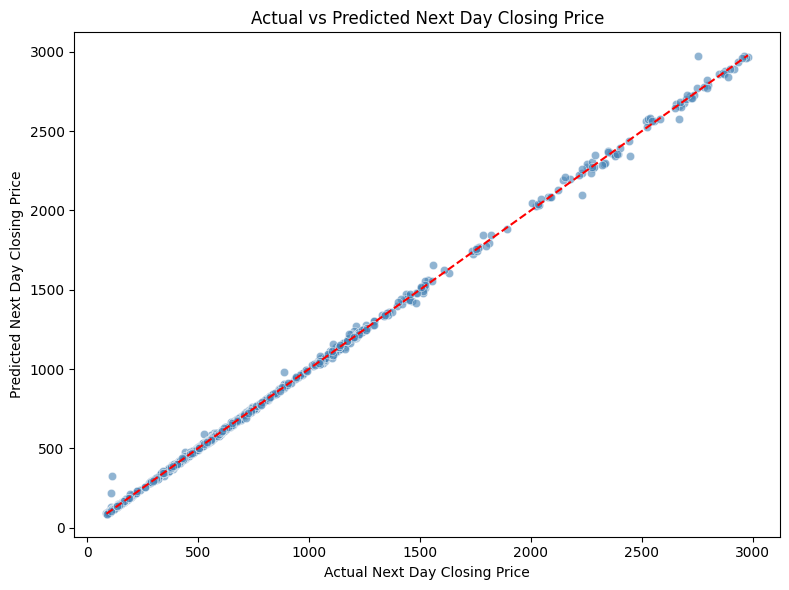

In [23]:
y_pred = rf_model.predict(X_test)
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='steelblue')
plt.xlabel('Actual Next Day Closing Price')
plt.ylabel('Predicted Next Day Closing Price')
plt.title('Actual vs Predicted Next Day Closing Price')
# Reference line (perfect prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.savefig('scatter_model.png')
plt.show()


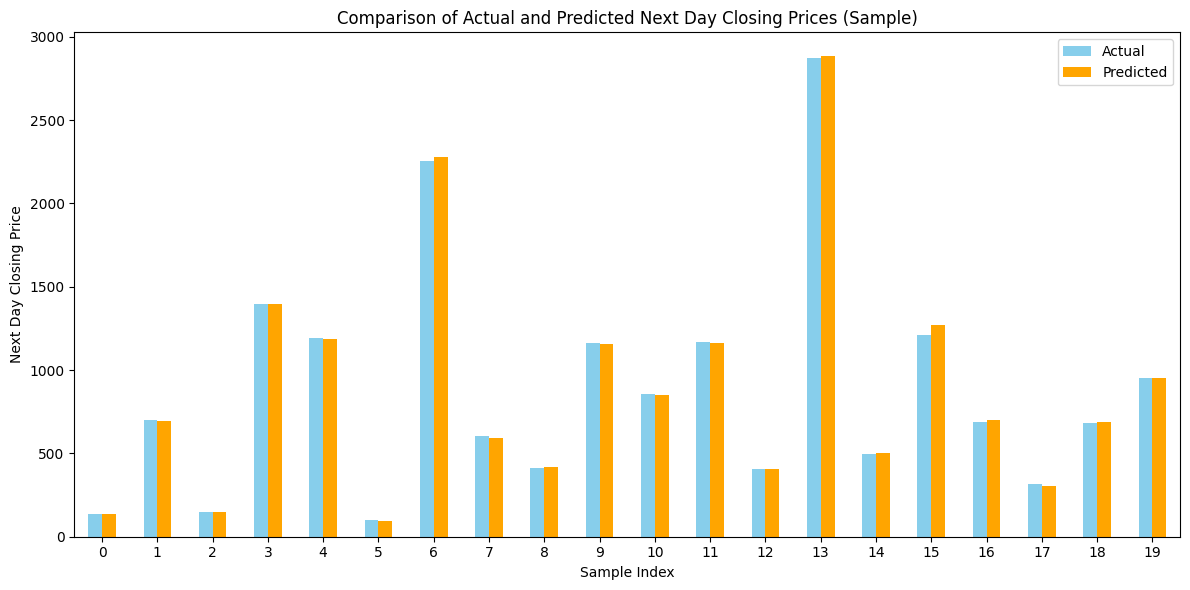

In [24]:
comparison_df = pd.DataFrame({
    'Actual': y_test.values[:20],
    'Predicted': y_pred[:20]
})

# Plot
comparison_df.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title('Comparison of Actual and Predicted Next Day Closing Prices (Sample)')
plt.xlabel('Sample Index')
plt.ylabel('Next Day Closing Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('comp.png')
plt.show()


### Linear Regression

In [25]:
X = load[['Opening Price', 'Closing Price', 'Highest Price', 'Lowest Price']]
y = load['Next Day Closing Price']

In [26]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Fit Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [28]:
# Predictions
y_pred = lr_model.predict(X_test)


In [29]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r3 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

In [30]:
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 5.47
RMSE: 13.68
R² Score: 0.9993


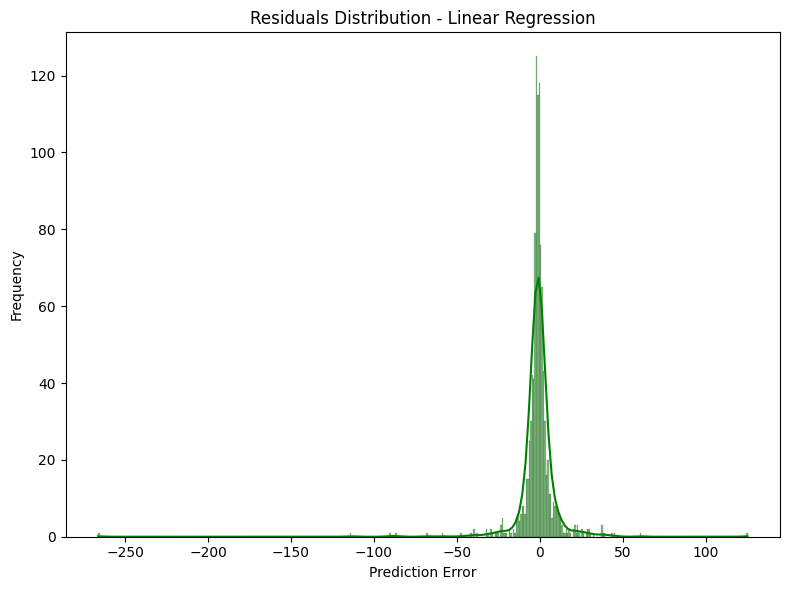

In [31]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title("Residuals Distribution - Linear Regression")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig('residuals.png')
plt.show()


### Decision Tree Regressor

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [35]:
#make prediction

In [36]:
y_pred_dt = dt_model.predict(X_test)

In [37]:
# Evaluation

In [38]:
mse = mean_squared_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor MSE: {mse:.2f}")
print(f"Decision Tree Regressor R² Score: {r2:.3f}")


Decision Tree Regressor MSE: 362.13
Decision Tree Regressor R² Score: 0.999


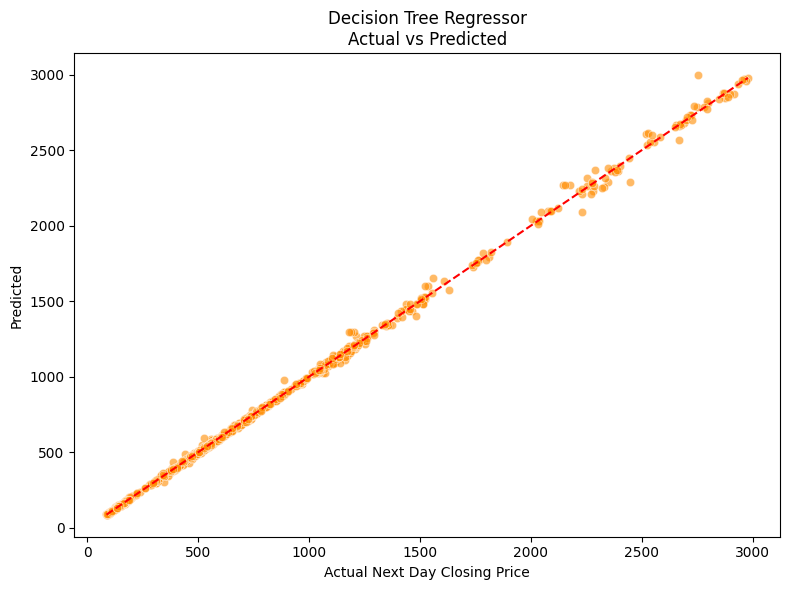

In [39]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.6, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Decision Tree Regressor\nActual vs Predicted')
plt.xlabel('Actual Next Day Closing Price')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()


### Comparion b/w models

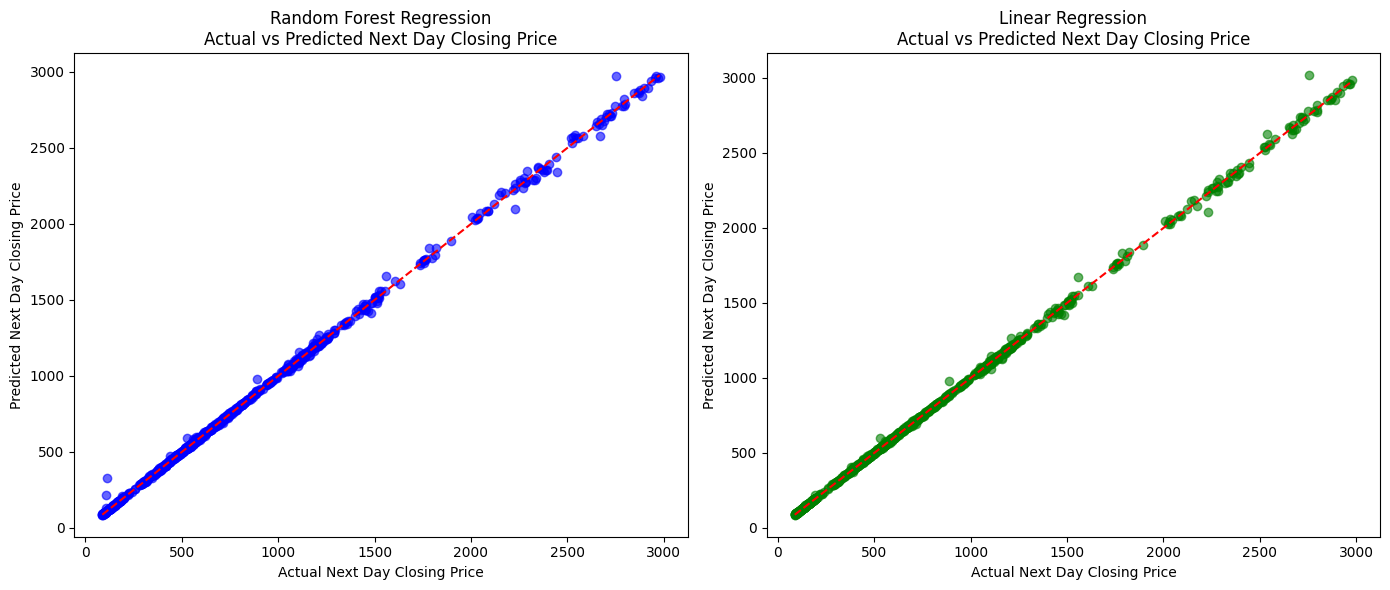

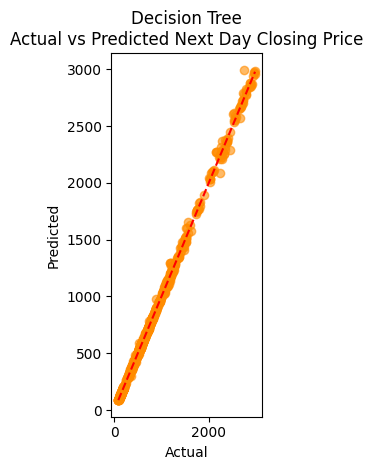

In [41]:
# Predict separately for both models
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

plt.figure(figsize=(14, 6))

# Plot for Random Forest predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest Regression\nActual vs Predicted Next Day Closing Price')
plt.xlabel('Actual Next Day Closing Price')
plt.ylabel('Predicted Next Day Closing Price')

# Plot for Linear Regression predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression\nActual vs Predicted Next Day Closing Price')
plt.xlabel('Actual Next Day Closing Price')
plt.ylabel('Predicted Next Day Closing Price')

plt.tight_layout()
plt.savefig('model_comp.png')
plt.show()
# Plot for Decision Tree Regressor predictions
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_dt, alpha=0.6, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Decision Tree\nActual vs Predicted Next Day Closing Price')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.savefig('model_comparison_all.png')
plt.show()

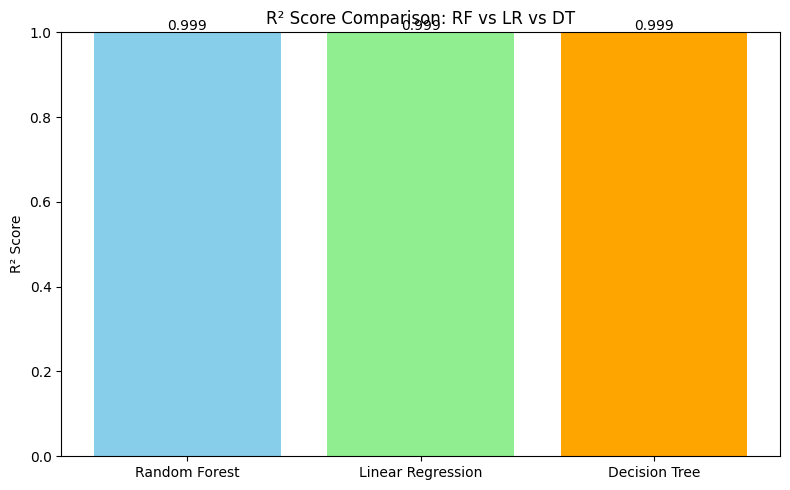

In [46]:
# Assuming r2_rf, r2_lr, r2_dt are the R² scores of Random Forest, Linear Regression, and Decision Tree
models = ['Random Forest', 'Linear Regression', 'Decision Tree']
r2_scores = [r2, r2, r2]  # Update variable names if needed

# Positions for the bars
x_pos = np.arange(len(models))

plt.figure(figsize=(8, 5))
bars = plt.bar(x_pos, r2_scores, color=['skyblue', 'lightgreen', 'orange'])

# Add numeric labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.3f}', ha='center', va='bottom')

plt.xticks(x_pos, models)
plt.ylabel('R² Score')
plt.title('R² Score Comparison: RF vs LR vs DT')
plt.ylim(0, 1)  # R² ranges from 0 to 1
plt.tight_layout()
plt.savefig('r2_score_comparison.png')
plt.show()



### DATA VISUALIZATION AFTER PREDECTING

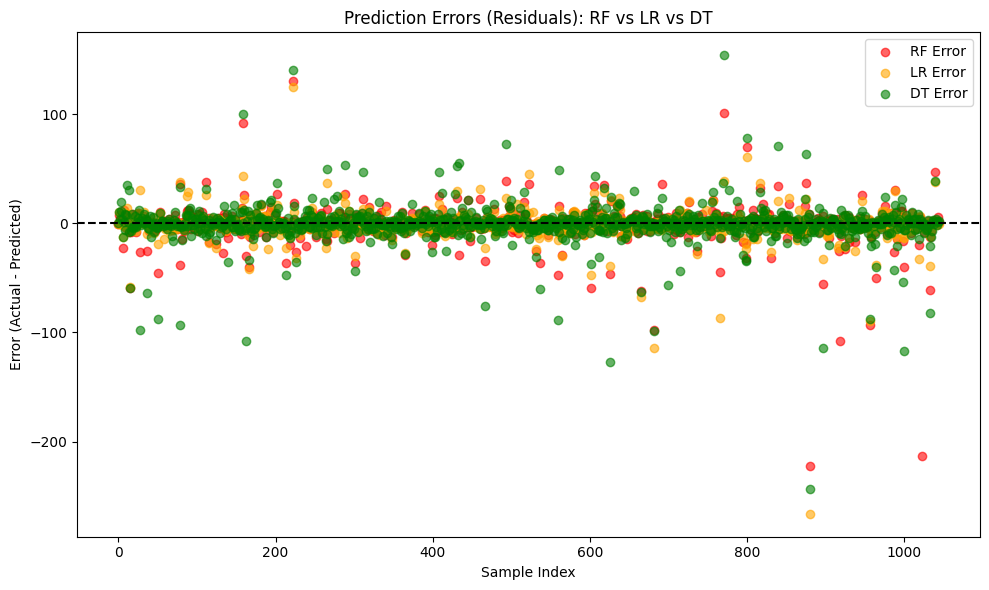

In [47]:
plt.figure(figsize=(10, 6))

# Residuals for each model
plt.scatter(range(len(y_test)), y_test - y_pred_rf, alpha=0.6, label='RF Error', color='red')
plt.scatter(range(len(y_test)), y_test - y_pred_lr, alpha=0.6, label='LR Error', color='orange')
plt.scatter(range(len(y_test)), y_test - y_pred_dt, alpha=0.6, label='DT Error', color='green')

# Reference line at 0
plt.axhline(y=0, color='black', linestyle='--')

# Titles and labels
plt.title('Prediction Errors (Residuals): RF vs LR vs DT')
plt.xlabel('Sample Index')
plt.ylabel('Error (Actual - Predicted)')
plt.legend()
plt.tight_layout()
plt.savefig('error_comparison1.png')
plt.show()


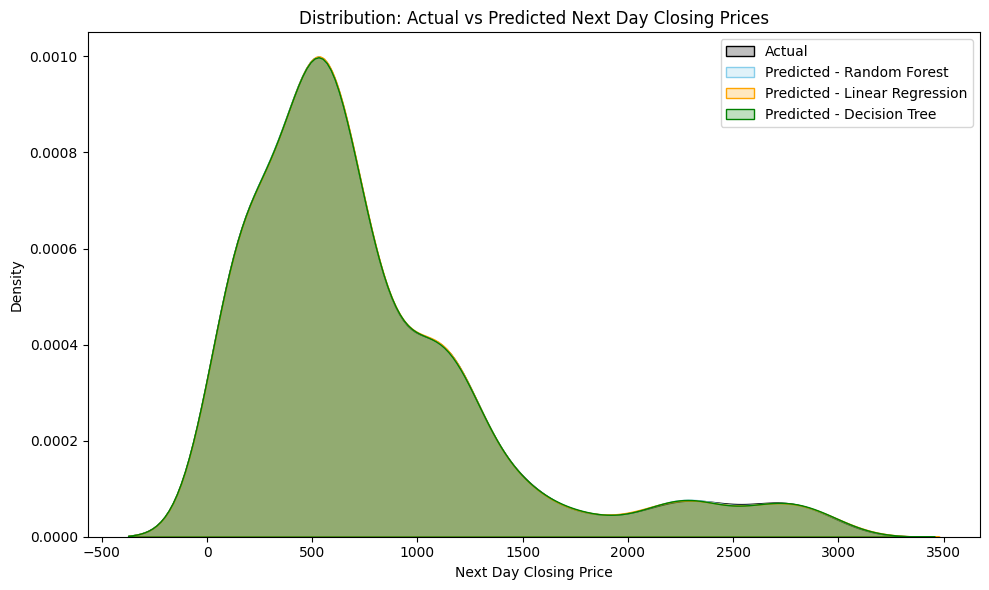

In [48]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', fill=True, color='black')
sns.kdeplot(y_pred_rf, label='Predicted - Random Forest', fill=True, color='skyblue')
sns.kdeplot(y_pred_lr, label='Predicted - Linear Regression', fill=True, color='orange')
sns.kdeplot(y_pred_dt, label='Predicted - Decision Tree', fill=True, color='green')
plt.title('Distribution: Actual vs Predicted Next Day Closing Prices')
plt.xlabel('Next Day Closing Price')
plt.legend()
plt.tight_layout()
plt.savefig('distribution_comparison1.png')
plt.show()


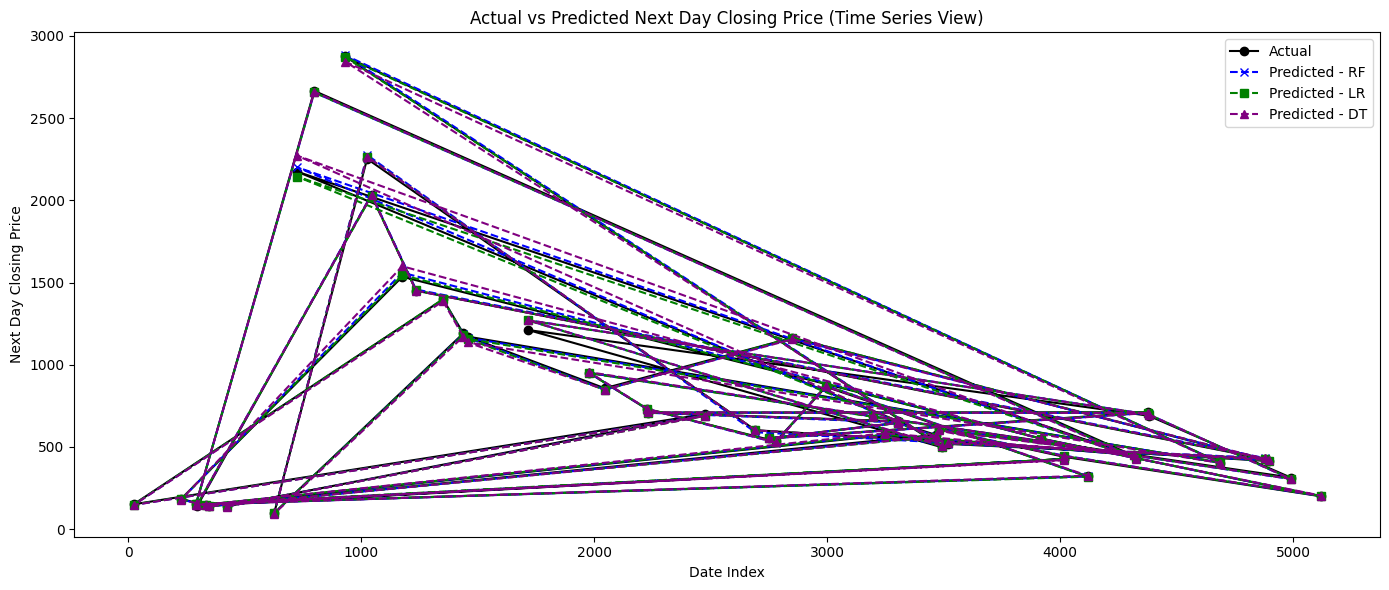

In [49]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.index[:50], y_test.values[:50], label='Actual', color='black', marker='o')
plt.plot(y_test.index[:50], y_pred_rf[:50], label='Predicted - RF', color='blue', linestyle='--', marker='x')
plt.plot(y_test.index[:50], y_pred_lr[:50], label='Predicted - LR', color='green', linestyle='--', marker='s')
plt.plot(y_test.index[:50], y_pred_dt[:50], label='Predicted - DT', color='purple', linestyle='--', marker='^')
plt.title('Actual vs Predicted Next Day Closing Price (Time Series View)')
plt.xlabel('Date Index')
plt.ylabel('Next Day Closing Price')
plt.legend()
plt.tight_layout()
plt.savefig('time_series_comparison.png')
plt.show()


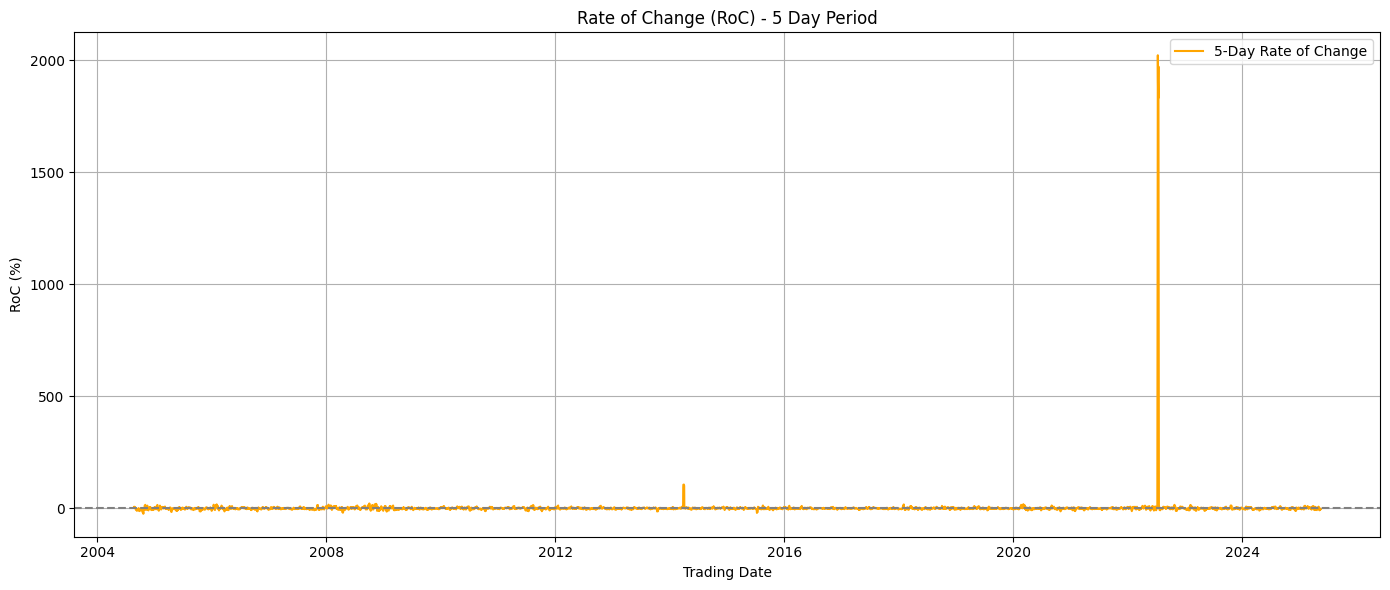

In [50]:
# Calculate 5-Day Rate of Change
load['RoC'] = load['Closing Price'].pct_change(periods=5) * 100

# Plot RoC
plt.figure(figsize=(14, 6))
plt.plot(load['Trading Date'], load['RoC'], color='orange', label='5-Day Rate of Change')
plt.axhline(0, linestyle='--', color='gray')  # Zero line for visual reference
plt.title('Rate of Change (RoC) - 5 Day Period')
plt.xlabel('Trading Date')
plt.ylabel('RoC (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('roc.png')
plt.show()


In [ ]:
#Cap the RoC for better visualization

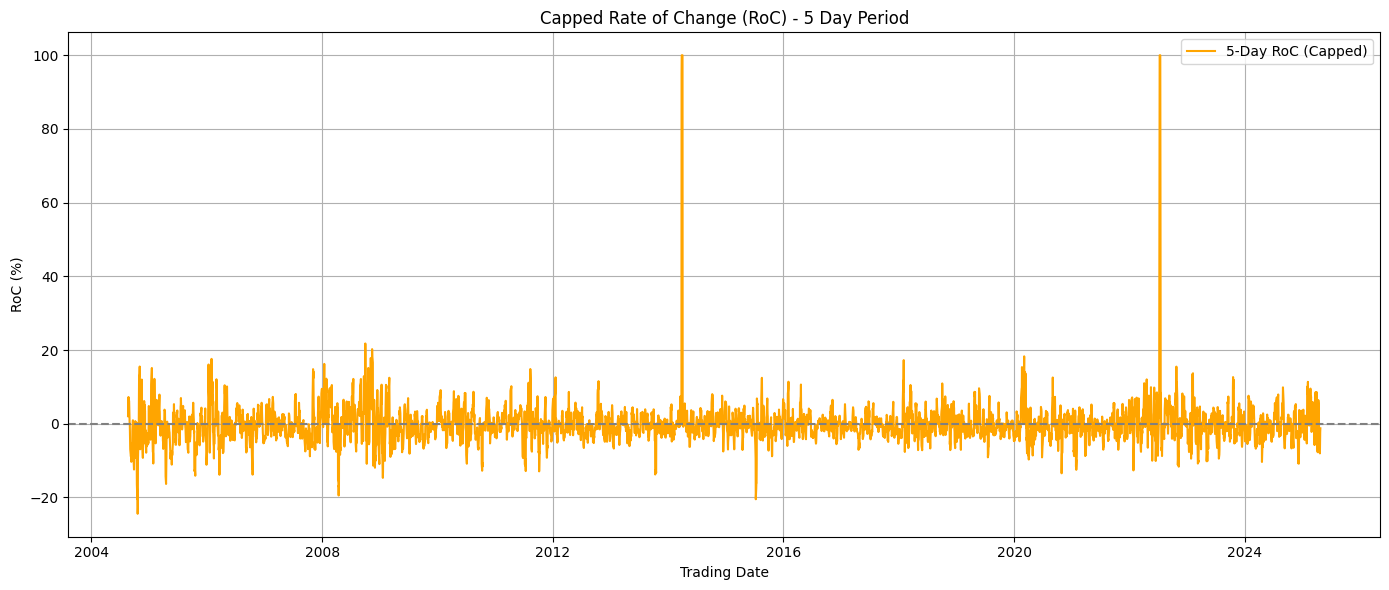

In [64]:
# Cap RoC at ±100 for visualization
load['RoC_capped'] = load['RoC'].clip(lower=-100, upper=100)

plt.figure(figsize=(14, 6))
plt.plot(load['Trading Date'], load['RoC_capped'], color='orange', label='5-Day RoC (Capped)')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Capped Rate of Change (RoC) - 5 Day Period')
plt.xlabel('Trading Date')
plt.ylabel('RoC (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('capped_roc.png')
plt.show()


In [ ]:
#The RoC plot shows mostly stable momentum, but there's a large spike in 2023. This is likely due to a data anomaly — either a sudden stock split, data entry error, or an outlier. In practice, we’d clean or cap these outliers to better reflect real-world trading behavior.”

In [51]:
# Find where RoC is extremely high
anomalies = load[load['RoC'] > 500]
print(anomalies[['Trading Date', 'Closing Price', 'RoC']])


    Trading Date  Closing Price          RoC
716   2022-07-15        2235.55  1971.872104
717   2022-07-14        2207.35  1830.514256
718   2022-07-13        2227.07  1855.285338
719   2022-07-12        2280.41  1903.699148
720   2022-07-11        2313.53  2021.920572
